<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/content/drive/MyDrive/bloco machine learning/Titanic-Dataset.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cortar as colunas c mt null e valores unicos

In [59]:
df = df.drop(columns=["Cabin", "Ticket", "Name","PassengerId"])
# df = df.dropna()

Convert strings into ints

In [60]:
from sklearn.preprocessing import LabelEncoder

sex = df.Sex
label_encoder = LabelEncoder()
encoded_sex = label_encoder.fit_transform(sex)
df['Sex'] = encoded_sex

In [61]:
embarked = df.Embarked
encoded_embarked = label_encoder.fit_transform(embarked)
df['Embarked'] = encoded_embarked

para colunas c poucos valores faltando preenchi com a media(melhor removerpra nao modificar a distribuicao)

In [62]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['Embarked', 'Age']])
df[['Embarked', 'Age']] = imputer.transform(df[['Embarked', 'Age']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


OBS: (transformar antes de fazer corr)

<Axes: >

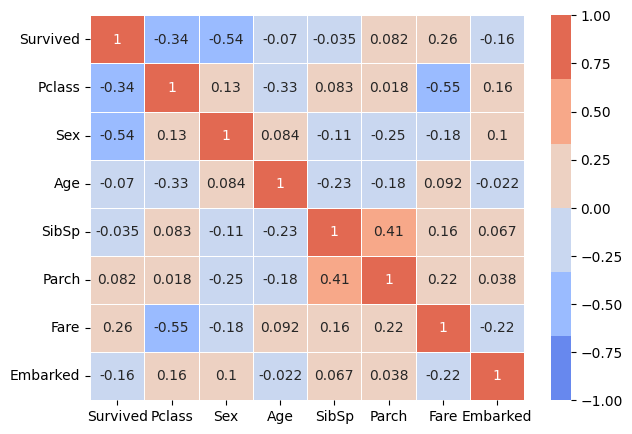

In [63]:
corr = df.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm"),linewidths=.5, annot=True)

<Axes: xlabel='Embarked', ylabel='Count'>

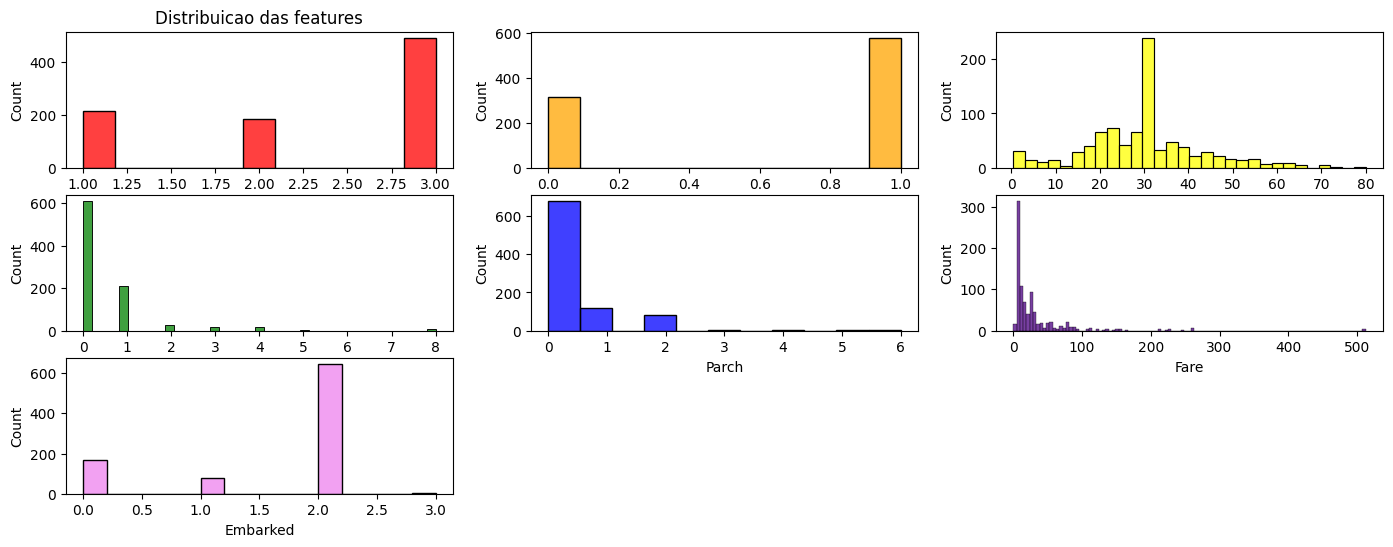

In [64]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(331)
ax.set_title("Distribuicao das features")
sns.histplot(df['Pclass'], color='red', ax=ax)
ax = fig.add_subplot(332)
sns.histplot(df['Sex'], color='orange',ax=ax)
ax = fig.add_subplot(333)
sns.histplot(df['Age'], color='yellow',ax=ax)
ax = fig.add_subplot(334)
sns.histplot(df['SibSp'], color='green',ax=ax)
ax = fig.add_subplot(335)
sns.histplot(df['Parch'], color='blue',ax=ax)
ax = fig.add_subplot(336)
sns.histplot(df['Fare'], color='indigo',ax=ax)
ax = fig.add_subplot(337)
sns.histplot(df['Embarked'], color='violet',ax=ax)

In [65]:
y = df.Survived
feature_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X = df[feature_names]

In [66]:
# y = df.Survived
# feature_names = ['Pclass','Sex','Fare','Embarked']

# X = df[feature_names]

In [67]:
y = df.Survived
feature_names = ['Pclass','Sex','Age','Parch','Fare','Embarked']

X = df[feature_names]

In [68]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y ,test_size=0.2, random_state=64)

In [69]:
from sklearn.preprocessing import PowerTransformer

df_power = df.copy()
pt = PowerTransformer()
power_train_X = pt.fit_transform(train_X)
power_test_X = pt.transform(test_X)
# train_df = ['survived',feature_names]
# train_df.feature_names = power_train_X

In [70]:
train_y

249    0
234    0
206    0
438    0
873    0
      ..
819    0
54     0
166    1
119    0
452    0
Name: Survived, Length: 712, dtype: int64

In [71]:
power_train_X

array([[-0.59626433,  0.71756088,  1.7537953 , -0.52958788,  0.41958066,
         0.58702842],
       [-0.59626433,  0.71756088, -0.42539298, -0.52958788, -0.48325003,
         0.58702842],
       [ 0.8647438 ,  0.71756088,  0.1910433 , -0.52958788, -0.07143444,
         0.58702842],
       ...,
       [-1.4627847 , -1.39360997,  0.01715652,  1.85052869,  1.14328847,
         0.58702842],
       [ 0.8647438 , -1.39360997, -2.44838724,  1.93480763,  0.60058866,
         0.58702842],
       [-1.4627847 ,  0.71756088,  0.04003933, -0.52958788,  0.48357833,
        -1.75736012]])

In [72]:
# corr = train_df.corr()
# f, ax = plt.subplots(figsize=(7,5))
# sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm"),linewidths=.5, annot=True)

AttributeError: 'list' object has no attribute 'corr'

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(power_train_X, train_y)

KNeighborsClassifier(n_neighbors=6)

In [74]:
from sklearn.metrics import accuracy_score

knn_pred_train_y = knn.predict(power_train_X)
knn_pred_test_y = knn.predict(power_test_X)

knn_train_accuracy = accuracy_score(train_y, knn_pred_train_y)
knn_test_accuracy = accuracy_score(test_y, knn_pred_test_y)
print("knn train Accuracy:", knn_train_accuracy)
print("knn test Accuracy:", knn_test_accuracy)

knn train Accuracy: 0.8455056179775281
knn test Accuracy: 0.8435754189944135


otimizando o N

In [75]:
train_accuracies = []
test_accuracies = []

neighbors_settings = range(1, 50)

In [76]:
for n in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(power_train_X, train_y)

  knn_pred_train_y = knn.predict(power_train_X)
  knn_pred_test_y = knn.predict(power_test_X)

  train_accuracies.append(accuracy_score(train_y, knn_pred_train_y))
  test_accuracies.append(accuracy_score(test_y, knn_pred_test_y))

# print(f'''{len(train_accuracies)}
# {len(test_accuracies)}''')

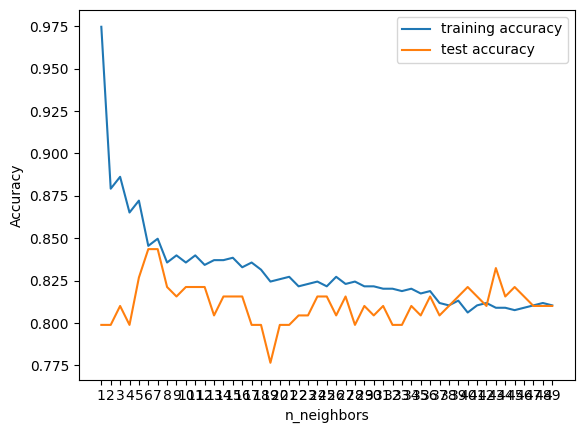

In [77]:
plt.plot(neighbors_settings, train_accuracies, label="training accuracy")
plt.plot(neighbors_settings, test_accuracies, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,50))
plt.legend()

In [ ]:

# Pclass
# Sex
# Age
# SibSp
# Parch
# Fare
# Embarked
'Pclass','Sex','Age','Parch','Fare','Embarked'

In [80]:
new_X = [[1,1,17,2,280,0],
         [3,0,17,1,7.8,0],
         [1,0,24,2,280,0]]

In [82]:
knn.predict(new_X)


array([1, 0, 1])